# Sales Data Analysis


# Introduction

In this project, a sales data is analysed using different python packages.
The process involves data importation, data cleaning, data transformation, analysis and summary

## Data importation, cleaning and transformation

In [2]:
## importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
# importing the data and showing the top five rows
data = pd.read_excel('sales_data_sample.xlsx')
data.head()

,SERIAL NUMBER,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,1.0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,...,95.0,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Small
1,2.0,10121.0,34.0,81.35,5.0,2765.90,2003-07-05 00:00:00,Shipped,2.0,5.0,...,95.0,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,France,EMEA,Henriot,Paul,Small
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,10134.0,41.0,94.74,2.0,3884.34,2003-01-07 00:00:00,Shipped,3.0,7.0,...,95.0,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Da Cunha,Daniel,Medium
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# checking the dimension of the data
print(f' Number of rows : {len(data)}')
print(f' Number of columns : {data.shape[1]}')

 Number of rows : 2831
 Number of columns : 22


In [5]:
# List of column names
data.columns

Index(['SERIAL NUMBER', 'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH',
       'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID',
       'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME',
       'ADDRESSLINE1', 'CITY', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [6]:
# Assessing the dataset for the prensence of null values
Null = data.isnull().sum().to_frame()
Null.index.name = 'Column Name'
Null = Null.rename(columns = {0:'Number of null values'})
Null = Null.reset_index()
Null

,Column Name,Number of null values
0,SERIAL NUMBER,9
1,ORDERNUMBER,9
2,QUANTITYORDERED,9
3,PRICEEACH,9
4,ORDERLINENUMBER,9
5,SALES,9
6,ORDERDATE,9
7,STATUS,9
8,QTR_ID,9
9,MONTH_ID,9


In [7]:
# from the above table, the following can be inferred
    # 1. There are few null values in the dataset apart from the territory column
    # 2. The territory column has a significant number of null values and hence will be removed from the dataset.
    # 3. We will not need some columns for our analysis. Hence, they will be removed
    # 4. The first and last names will be combined together. 

**The following can be inferred from the above table**

     1. There are few null values in the dataset apart from the territory column
     
     2. The territory column has a significant number of null values and hence will be removed from the dataset.
     
     3. We will not need some columns for our analysis. Hence, they will be removed
     
     4. The first and last names will be combined together. 

In [8]:
# Removing first and last names after they are combined to 'FULL NAME'.
data['FULL NAME'] = data['CONTACTFIRSTNAME'] + ' ' + data['CONTACTLASTNAME']
data = data.drop(['CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis = 1)
data.head()

,SERIAL NUMBER,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,...,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,DEALSIZE,FULL NAME
0,1.0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,...,Motorcycles,95.0,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,NaN,Small,Kwai Yu
1,2.0,10121.0,34.0,81.35,5.0,2765.90,2003-07-05 00:00:00,Shipped,2.0,5.0,...,Motorcycles,95.0,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,France,EMEA,Small,Paul Henriot
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,10134.0,41.0,94.74,2.0,3884.34,2003-01-07 00:00:00,Shipped,3.0,7.0,...,Motorcycles,95.0,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Medium,Daniel Da Cunha
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Removing the unwanted columns. The new data will be termed 'dataset'
dataset = data[['ORDERDATE', 'FULL NAME',  'STATUS', 'QTR_ID', 'MONTH_ID',
       'YEAR_ID', 'PRODUCTLINE', 'PRODUCTCODE', 'CITY', 'COUNTRY', 'SALES','DEALSIZE']]
dataset.head()

,ORDERDATE,FULL NAME,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CITY,COUNTRY,SALES,DEALSIZE
0,2/24/2003 0:00,Kwai Yu,Shipped,1.0,2.0,2003.0,Motorcycles,S10_1678,NYC,USA,2871.00,Small
1,2003-07-05 00:00:00,Paul Henriot,Shipped,2.0,5.0,2003.0,Motorcycles,S10_1678,Reims,France,2765.90,Small
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-07 00:00:00,Daniel Da Cunha,Shipped,3.0,7.0,2003.0,Motorcycles,S10_1678,Paris,France,3884.34,Medium
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Checking the data types of the dataset 
dataset.dtypes

ORDERDATE       object
FULL NAME       object
STATUS          object
QTR_ID         float64
MONTH_ID       float64
YEAR_ID        float64
PRODUCTLINE     object
PRODUCTCODE     object
CITY            object
COUNTRY         object
SALES          float64
DEALSIZE        object
dtype: object

In [11]:
# The QTR_ID, MONTH_ID and YEAR_ID will be changed to object while ORDERDATE will be changed to datetime
# This is necessary for appropriate behaviour of our data during analysis
dataset = dataset.astype({'QTR_ID': 'object', 'MONTH_ID': 'object', 'YEAR_ID':'object'})
dataset['ORDERDATE'] = pd.to_datetime(dataset['ORDERDATE'])
# Double checking to ensure that all the datatypes are as expected
dataset.dtypes

ORDERDATE      datetime64[ns]
FULL NAME              object
STATUS                 object
QTR_ID                 object
MONTH_ID               object
YEAR_ID                object
PRODUCTLINE            object
PRODUCTCODE            object
CITY                   object
COUNTRY                object
SALES                 float64
DEALSIZE               object
dtype: object

In [12]:
# Double checking to ensure that all the datatypes are as expected
dataset.dtypes

ORDERDATE      datetime64[ns]
FULL NAME              object
STATUS                 object
QTR_ID                 object
MONTH_ID               object
YEAR_ID                object
PRODUCTLINE            object
PRODUCTCODE            object
CITY                   object
COUNTRY                object
SALES                 float64
DEALSIZE               object
dtype: object

In [13]:
# Now all the datatypes are appropriate for analysis
# The next stage is removing the null values from the dataset and then check the number of rows that are totally removed
dataset = dataset.dropna(axis = 0)
print(f' Number of rows before removing null : {len(data)}')
print(f' Number of rows after removing null : {len(dataset)}')
print(f' Number of rows removed : {len(data) - len(dataset)}')

 Number of rows before removing null : 2831
 Number of rows after removing null : 2822
 Number of rows removed : 9


In [14]:
# Crosschecking again to be sure that there is no null values
Null = dataset.isnull().sum().to_frame()
Null.index.name = 'Column Name'
Null = Null.rename(columns = {0:'Number of null values'})
Null = Null.reset_index()
Null

,Column Name,Number of null values
0,ORDERDATE,0
1,FULL NAME,0
2,STATUS,0
3,QTR_ID,0
4,MONTH_ID,0
5,YEAR_ID,0
6,PRODUCTLINE,0
7,PRODUCTCODE,0
8,CITY,0
9,COUNTRY,0


In [15]:
# Checking for duplicates in the dataset
print(f' Number of duplicates is {dataset.duplicated().sum()}')

 Number of duplicates is 0


## Analysing the data using visualization, aggregation and statistics

In [16]:
# Statistical summary for the sales
dataset.describe()
# In the table below, mean, 50%, min and max represent the mean, medium, minimum and the maximum sales respectively

,SALES
count,2822.000000
mean,3553.308257
std,1841.932946
min,482.130000
25%,2203.270000
50%,3184.410000
75%,4505.547500
max,14082.800000


In [17]:
# statistical summary for other categorical features
dataset.describe(include = 'object')
# From the table below, top and freq represent the most common variable and its frequency
# For example, there are 92 customers; Diego Freyre has the highest order of 259 

,FULL NAME,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CITY,COUNTRY,DEALSIZE
count,2822,2822,2822.0,2822.0,2822.0,2822,2822,2822,2822,2822
unique,92,6,4.0,12.0,3.0,7,109,73,19,3
top,Diego Freyre,Shipped,4.0,11.0,2004.0,Classic Cars,S18_3232,Madrid,USA,Medium
freq,259,2616,1094.0,597.0,1345.0,967,52,304,1003,1383


In [18]:
# Setting the Orderdate column as index for easy time series analysis
dataset = dataset.set_index('ORDERDATE')
dataset.head()

,FULL NAME,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CITY,COUNTRY,SALES,DEALSIZE
ORDERDATE,,,,,,,,,,,
2003-02-24,Kwai Yu,Shipped,1.0,2.0,2003.0,Motorcycles,S10_1678,NYC,USA,2871.00,Small
2003-07-05,Paul Henriot,Shipped,2.0,5.0,2003.0,Motorcycles,S10_1678,Reims,France,2765.90,Small
2003-01-07,Daniel Da Cunha,Shipped,3.0,7.0,2003.0,Motorcycles,S10_1678,Paris,France,3884.34,Medium
2003-08-25,Julie Young,Shipped,3.0,8.0,2003.0,Motorcycles,S10_1678,Pasadena,USA,3746.70,Medium
2003-10-10,Julie Brown,Shipped,4.0,10.0,2003.0,Motorcycles,S10_1678,San Francisco,USA,5205.27,Medium


In [19]:
# Total sales for each year
Yearly_Sales = dataset.resample('Y').sum()
Yearly_Sales

,SALES
ORDERDATE,
2003-12-31,3511786.59
2004-12-31,4724162.60
2005-12-31,1791486.71


Text(0, 0.5, 'Sales')

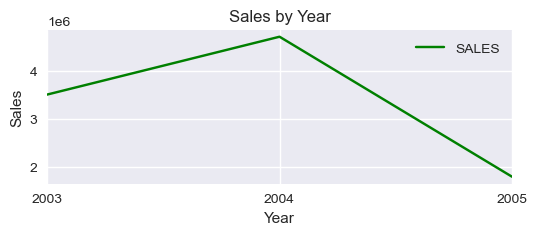

In [20]:
# A line chart showing the trend of sales by year
Yearly_Sales.plot(kind = 'line', figsize = (6,2), color = 'green')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')

The sales was increasing from 2003 to 2004 but it drastically went down in 2005.

In [21]:
# Total sales by quarter
Quarterly_Sales = dataset.resample('q').sum()
Quarterly_Sales

,SALES
ORDERDATE,
2003-03-31,723775.24
2003-06-30,847728.26
2003-09-30,550627.66
2003-12-31,1389655.43
2004-03-31,1125754.13
2004-06-30,877262.38
2004-09-30,1073610.82
2004-12-31,1647535.27
2005-03-31,915621.41


Text(0, 0.5, 'Sales')

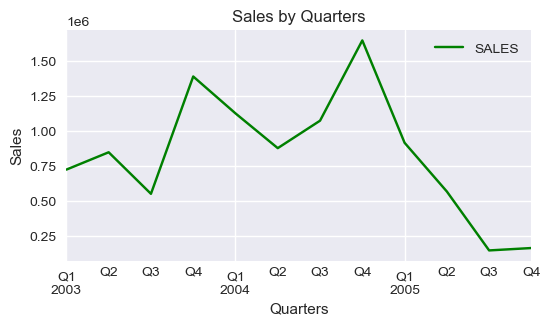

In [22]:
# Trend of sales by quarter
Quarterly_Sales.plot(kind = 'line', figsize = (6,3), color = 'green')
plt.title('Sales by Quarters')
plt.xlabel('Quarters')
plt.ylabel('Sales')

The quarterly review shows that the last quarters of the first two years had the higest sales for each year before the crash of the following year.

In [23]:
# Total sales by month
Monthly_Sales = dataset.resample('m').sum()
Monthly_Sales

,SALES
ORDERDATE,
2003-01-31,228402.12
2003-02-28,255820.01
2003-03-31,239553.11
2003-04-30,262919.85
2003-05-31,322093.48
2003-06-30,262714.93
2003-07-31,123712.40
2003-08-31,211663.09
2003-09-30,215252.17


Text(0, 0.5, 'Sales')

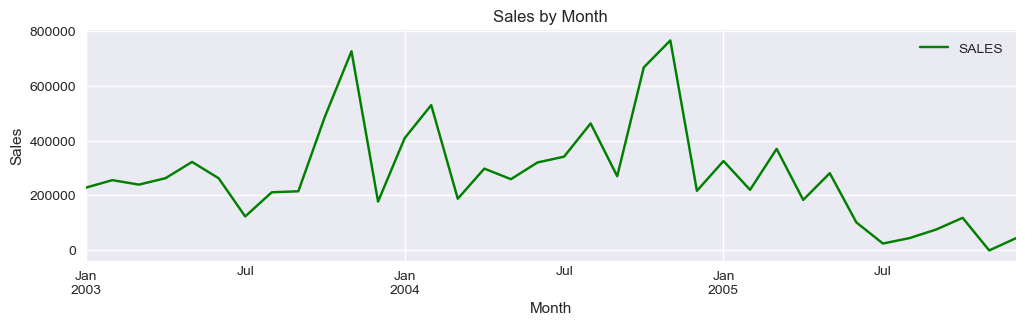

In [24]:
# Trend of sales by month
Monthly_Sales.plot(kind = 'line', figsize = (12,3), color =('green'))
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')

<Figure size 1000x300 with 0 Axes>

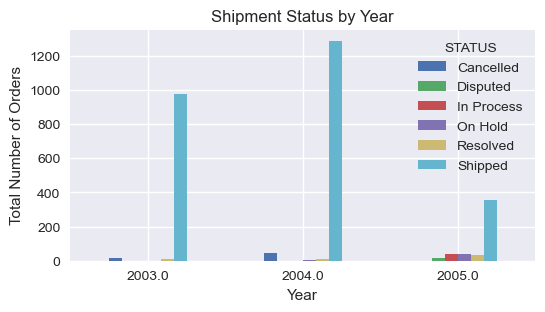

In [32]:
# Comparing the status of the shipment for each year
plt.figure(figsize = (10,3))
pd.crosstab(dataset.YEAR_ID, dataset.STATUS).plot(kind = 'bar', figsize = (6,3))
plt.title('Shipment Status by Year')
plt.xlabel('Year',)
plt.ylabel('Total Number of Orders')
plt.xticks(rotation = 0)
plt.show()

In [33]:
# Creating a table to show the percentages of the orders that were shipped for each year
Yearly_Shipped_Status = pd.crosstab(dataset.YEAR_ID, dataset.STATUS)
Yearly_Shipped_Status['% Shipped'] = (Yearly_Shipped_Status['Shipped']/Yearly_Shipped_Status.sum(axis = 1))*100
Yearly_Shipped_Status

STATUS,Cancelled,Disputed,In Process,On Hold,Resolved,Shipped,% Shipped
YEAR_ID,,,,,,,
2003.0,16,0,0,0,8,975,97.597598
2004.0,44,0,0,6,8,1287,95.687732
2005.0,0,14,41,38,31,354,74.058577


**More than 95% of the orders were shipped in the first two years but reduced to less than 75% in the following year**

In [34]:
# A table showing total sales by country
Country_sales = dataset.groupby('COUNTRY').sum().reset_index()
Country_sales = Country_sales.sort_values('SALES', ascending = False)
Country_sales['% OF TOTAL'] = (Country_sales['SALES']/Country_sales['SALES'].sum()) * 100
Country_sales

,COUNTRY,SALES,% OF TOTAL
18,USA,3622789.88,36.128776
14,Spain,1215686.92,12.123607
6,France,1110916.52,11.078770
0,Australia,630623.10,6.288977
17,UK,478880.46,4.775702
9,Italy,374674.31,3.736492
5,Finland,329581.91,3.286801
11,Norway,307463.70,3.066225
13,Singapore,288488.41,2.876991
4,Denmark,245637.15,2.449651


**Out of the 19 countries, customers from USA alone makes up 36% of the total sales and the top 5 countries combined [USA(36.13%), Spain(12.12%), France(11.0%), Australia(6.29%) and UK(4.77%)] makes up 70% of the total sales** 

Text(0, 0.5, 'Percentage Of Total Sales')

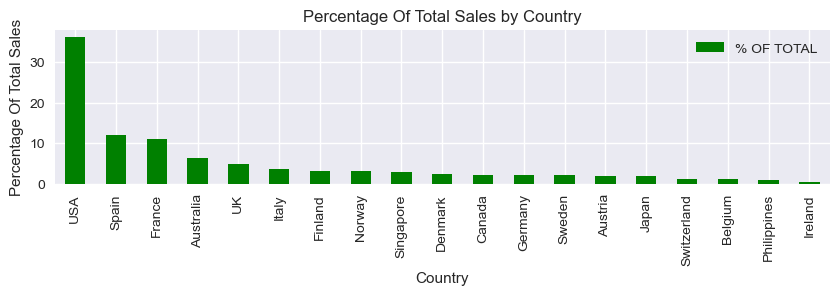

In [35]:
# A column chart visualizing the Country_sales in percentages.
Country_Percentage = Country_sales.groupby('COUNTRY')[['% OF TOTAL']].sum().sort_values('% OF TOTAL', ascending = False)
fig = Country_Percentage.plot(kind = 'bar', figsize = (10, 2), color = 'green')
plt.title('Percentage Of Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Percentage Of Total Sales')

In [36]:
# Creating a table showing the top cities and their countries
Cities = dataset.groupby(['COUNTRY', 'CITY'])['SALES'].sum().to_frame()
Cities = Cities.sort_values('SALES', ascending = False).reset_index()
Cities['% OF TOTAL'] = (Cities['SALES']/Cities['SALES'].sum()) * 100
Top_10_Cities = Cities.iloc[:10]
Top_10_Cities.index = ([1,2,3,4,5,6,7,8,9,10])
Top_10_Cities

,COUNTRY,CITY,SALES,% OF TOTAL
1,Spain,Madrid,1082551.44,10.795895
2,USA,San Rafael,654858.06,6.530663
3,USA,NYC,560787.77,5.592534
4,Singapore,Singapore,288488.41,2.876991
5,France,Paris,268944.68,2.682088
6,USA,San Francisco,224358.68,2.237448
7,USA,New Bedford,207874.86,2.073061
8,France,Nantes,204304.86,2.037459
9,Australia,Melbourne,200995.41,2.004455
10,USA,Brickhaven,165255.20,1.648030


**Out of 73 cities, Madrid has the higest sales of 10% and five of the top 10 cities are from USA.**

In [37]:
# Creating a table to explore the top 20 products with the highest sales
Product_Table = dataset.groupby('PRODUCTCODE').sum()[['SALES']].sort_values('SALES', ascending = False).reset_index()
Product_Table['% OF TOTAL'] = (Product_Table['SALES']/Product_Table['SALES'].sum()) * 100
Top_20_Product = Product_Table.iloc[:20, :]
Top_20_Product.index = ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
Top_20_Product


,PRODUCTCODE,SALES,% OF TOTAL
1,S18_3232,288245.42,2.874568
2,S10_1949,191073.03,1.905502
3,S10_4698,170401.07,1.699348
4,S12_1108,168585.32,1.681241
5,S18_2238,154623.95,1.542009
6,S12_3891,145332.04,1.449344
7,S24_3856,140626.90,1.402421
8,S12_2823,140006.16,1.396231
9,S18_1662,139421.97,1.390405
10,S12_1099,137177.01,1.368017


**The top 20 products out of 109 accounts for about 30% of total sales**

In [38]:
# Creating a table to explore the top 20 customers with the highest sales
Customer_Table = dataset.groupby('FULL NAME').sum()[['SALES']].sort_values('SALES', ascending = False).reset_index()
Customer_Table['% OF TOTAL'] = (Customer_Table['SALES']/Customer_Table['SALES'].sum()) * 100
Top_20_Customer = Customer_Table.iloc[:20, :]
Top_20_Customer .index = ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
Top_20_Customer 


,FULL NAME,SALES,% OF TOTAL
1,Diego Freyre,912294.11,9.097980
2,Valarie Nelson,654858.06,6.530663
3,Peter Ferguson,200995.41,2.004455
4,Jeff Young,197736.94,1.971959
5,Janine Labrune,180124.90,1.796321
6,Eric Natividad,172989.68,1.725164
7,Kwai Yu,164069.44,1.636205
8,Sue Frick,160010.27,1.595725
9,Victoria Ashworth,157807.81,1.573760
10,Anna O'Hara,153996.13,1.535748


**The top 5 customers, out of 92 in total accounts for 21% of total sales**

In [39]:
# Creating the deal size table
Deal_Size = dataset.groupby('DEALSIZE')[['SALES']].sum().sort_values('SALES', ascending = False).reset_index()
Deal_Size['% OF TOTAL'] = (Deal_Size['SALES']/Deal_Size['SALES'].sum()) * 100
Deal_Size

,DEALSIZE,SALES,% OF TOTAL
0,Medium,6082239.29,60.655978
1,Small,2643077.35,26.358457
2,Large,1302119.26,12.985566


Text(0, 0.5, '')

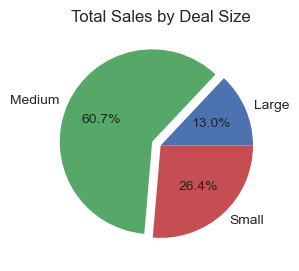

In [41]:
# Creating a pie chart for the Deal_Size table
Deal = Deal_Size.groupby('DEALSIZE')['% OF TOTAL'].sum()
fig = Deal.plot(kind = 'pie', figsize = (6,3), explode = [0, 0.1, 0], autopct = ('%2.1f%%'))
plt.title('Total Sales by Deal Size')
plt.ylabel('')

**Medium size deals account for 60% of all sales**

In [42]:
# Creating a Productline table
Productline = dataset.groupby('PRODUCTLINE')[['SALES']].sum().sort_values('SALES', ascending = False).reset_index()
Productline['% OF TOTAL'] = (Productline['SALES']/Productline['SALES'].sum()) * 100
Productline

,PRODUCTLINE,SALES,% OF TOTAL
0,Classic Cars,3919615.66,39.088913
1,Vintage Cars,1903150.84,18.979437
2,Motorcycles,1161195.39,11.580183
3,Trucks and Buses,1127789.84,11.247041
4,Planes,975003.57,9.723359
5,Ships,714437.13,7.124824
6,Trains,226243.47,2.256244


Text(0, 0.5, 'Percentage of Total Sales')

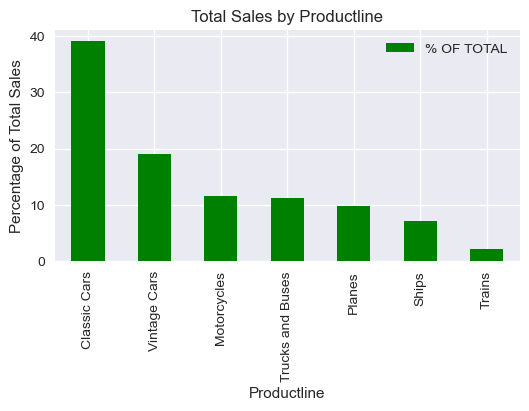

In [43]:
# Visualizing the productline table
fig = Productline.groupby('PRODUCTLINE')[['% OF TOTAL']].sum().sort_values('% OF TOTAL', ascending = False)
fig.plot(kind = 'bar', color = 'green', figsize = (6,3))
plt.title('Total Sales by Productline')
plt.xlabel('Productline')
plt.ylabel('Percentage of Total Sales')

## Summary 

The average sales per customer is 3553 dollars while the mimimum and maximum are 482 and 14082 dollars respectively.

The sales was increasing from 2003 to 2004 but it drastically went down in 2005. The quarterly review shows that the last quarters of the first two years had the higest sales for each year before the crash of the following year.

More than 95% of the orders were shipped in the first two years but reduced to less than 75% in the following year

Out of the 19 countries, customers from USA alone makes up 36% of the total sales and the top 5 countries combined [USA(36.13%), Spain(12.12%), France(11.0%), Australia(6.29%) and UK(4.77%)] makes up 70% of the total sales 

Out of 73 cities, Madrid has the higest sales of 10% and five of the top 10 cities are from USA.

The top 20 products out of 109 account for about 30% of total sales

Diego Freyre(9.1%) and Valarie Nelson(6.1%) are the top two customers. Out of 92 customers, they are responsible for 
15% of total sales

Medium size deals account for 60% of all sales

## Recommendations
There was a need to investigate why there was a drastic drop in sales in 2005.

The company should find a way to improve sales in other 14 countries apart from the top 5

The company should also brainstorm on a market strategy that will improve the sales of products outside the top 20.

The marketers should also investigate why Diego Freyre and Valarie Nelson has invested so much in the company's products. This might help in attracting and improving the interest of other customers